<a href="https://colab.research.google.com/github/omshreya-s/URV/blob/main/URV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OMSHREYA'S CODE


To use the code below you need a file called data that contains all the datafiles from the google drive shared with us. I'm not too familiar with Google Colab so I will try to find a way to upload the files. I was only able to do some formatting. I'm not sure how to convert QVAR to EDA.

In [ ]:
import glob
import pandas as pd
import os

#puts all the files together
filenames = glob.glob("data/*.txt")

for file in filenames:

    #reading text file into pandas Dataframe
    data = pd.read_csv(file, sep='\t')

    #dropping last column because it only has NaN values
    data = data.iloc[:, :-1]

    #TODO: Convert QVAR to EDA and append to dataframe

    #converting dataframe back to txt
    data.to_csv(os.path.basename(file), index=False)


#Ario's Code

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("user_sarna test_class_000.txt", sep="\t")
df['Timestamp_sec'] = df['Timestamp [us]'] / 1e6
df.head() #show the basic data construction

#raw QVAR image
plt.figure(figsize=(12, 4))
plt.plot(df['Timestamp_sec'], df['QVAR [LSB]'], color='blue')
plt.xlabel("Time (s)")
plt.ylabel("QVAR [LSB]")
plt.title("QVAR signal over time")
plt.grid(True)
plt.show()

#low-pass filtered QVAR image
from scipy.signal import butter, filtfilt
import numpy as np

#define low-pass filter function
def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

#parameter setting
fs = 120
cutoff = 2
order = 4

# take QVAR and time
time_sec = df['Timestamp_sec']
qvar = df['QVAR [LSB]']

qvar_filtered = butter_lowpass_filter(qvar, cutoff, fs, order)
plt.figure(figsize=(12, 6))
plt.plot(time_sec, qvar, label='Raw QVAR', color='blue', alpha=0.5)
plt.plot(time_sec, qvar_filtered, label='Low-pass Filtered QVAR', color='red', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("QVAR [LSB]")
plt.title(f"QVAR signal - Low-pass filtered (cutoff={cutoff} Hz)")
plt.legend()
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'user_sarna test_class_000.txt'

# Leon's Code

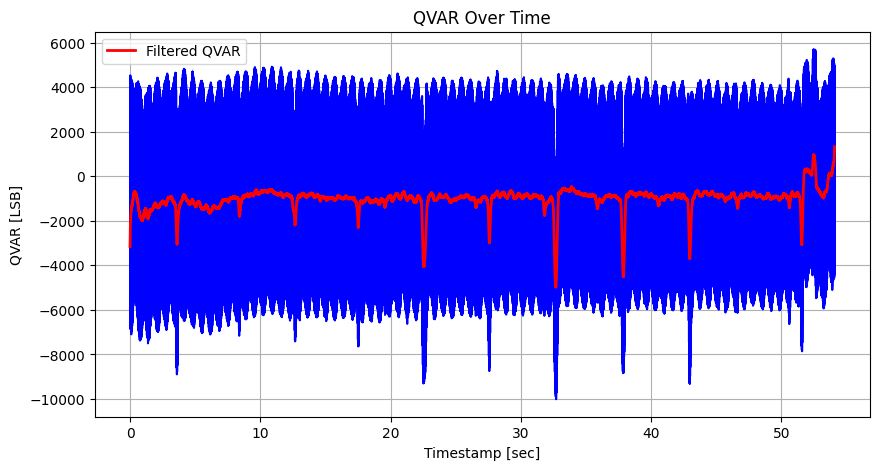

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("user_sarna3 test_class_000.txt", sep="\t")

df['Timestamp_sec'] = df['Timestamp [us]'] / 1e6  # Convert microseconds to seconds
df.head()

from scipy.signal import butter, filtfilt
def low_pass_filter(data, cutoff_freq, sample_rate):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(1, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

cutoff_frequency = 0.5  # Cutoff frequency in Hz
sample_rate = 120

filtered_qvar = low_pass_filter(df['QVAR [LSB]'], cutoff_frequency, sample_rate)
# Plot filtered QVAR vs Timestamp

# Plot QVAR vs Timestamp
plt.figure(figsize=(10, 5))
plt.plot(df['Timestamp_sec'], df['QVAR [LSB]'], color='blue')
plt.plot(df['Timestamp_sec'], filtered_qvar, color='red', label='Filtered QVAR', linewidth=2)
plt.legend()
plt.title('QVAR Over Time')
plt.xlabel('Timestamp [sec]')
plt.ylabel('QVAR [LSB]')
plt.grid(True)

plt.show()